In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import pywt
import re
import cv2

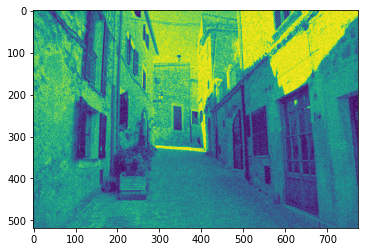

In [3]:
noisy_img = plt.imread('FFDNET_IPOL/noisy.png')
red_noise_img = noisy_img[:,:,0]
green_noise_img = noisy_img[:,:,1]
blue_noise_img = noisy_img[:,:,2]
plt.imshow(red_noise_img)
plt.show()

In [4]:
def Gamma(q, tau):
    return q**3/(q**2+tau**2)

coeffs = pywt.wavedec2(noisy_img, 'haar', axes=(0,1), level=2)

def reconstruct(tau,coeffs):
    coeffs_rec = [coeffs[0]]
    for i in range(1, len(coeffs)):
        coeffs_rec.append((Gamma(coeffs[i][0],tau), Gamma(coeffs[i][0],tau), Gamma(coeffs[i][0],tau)))
    return np.clip(pywt.waverec2(coeffs_rec, 'haar', axes = (0, 1)), 0, 255)

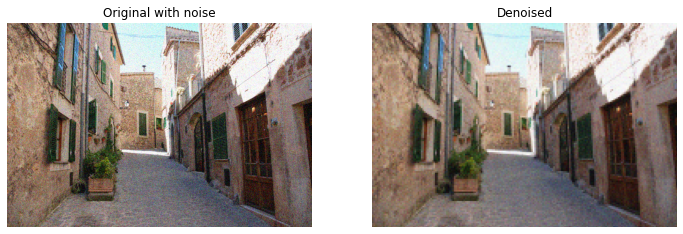

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


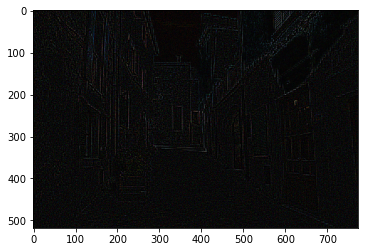

In [6]:
recon = reconstruct(7.5, coeffs)

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Original with noise')

plt.subplot(1, 2, 2)
plt.imshow(recon)
plt.axis('off')
plt.title('Denoised')

plt.show()

plt.imshow(noisy_img-recon)
plt.show()

In [16]:
def reconstruct(tau,coeffs):
    coeffs_rec = [coeffs[0]]
    # coeffs_rec = []
    for i in range(1, len(coeffs)):
        coeffs_rec.append(Gamma(coeffs[i],tau))
    return np.clip(pywt.waverec(coeffs_rec, 'haar'), 0, 255)

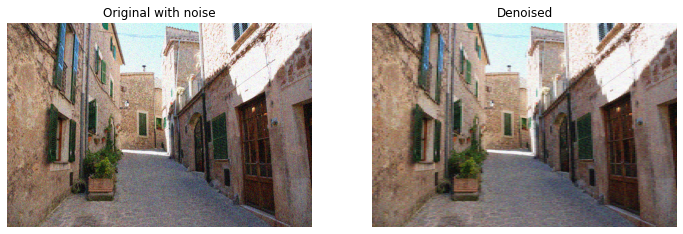

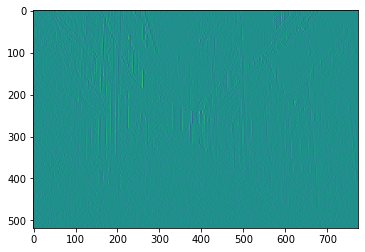

In [22]:
recon_red = reconstruct(7.5, coeffs = pywt.wavedec(red_noise_img, 'haar', level=2))
recon_green = reconstruct(7.5, coeffs = pywt.wavedec(green_noise_img, 'haar', level=2))
recon_blue = reconstruct(7.5, coeffs = pywt.wavedec(blue_noise_img, 'haar', level=2))
recon_img = np.zeros((recon_red.shape[0], recon_red.shape[1], 3))
recon_img[:,:,0] = recon_red
recon_img[:,:,1] = recon_green
recon_img[:,:,2] = recon_blue

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Original with noise')

plt.subplot(1, 2, 2)
plt.imshow(recon_img)
plt.axis('off')
plt.title('Denoised')

plt.show()

plt.imshow(red_noise_img-recon)
plt.show()

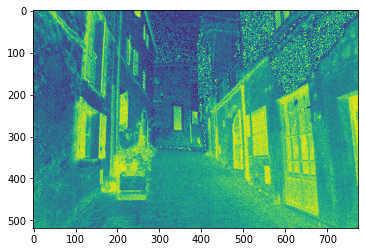

In [19]:
wavelet = pywt.Wavelet('haar')
coeffs = pywt.wavedec(red_noise_img, 'haar', level = 0)
y = np.clip(pywt.waverec(coeffs, 'haar'),0,255).astype(np.uint8)
plt.imshow(y-red_noise_img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


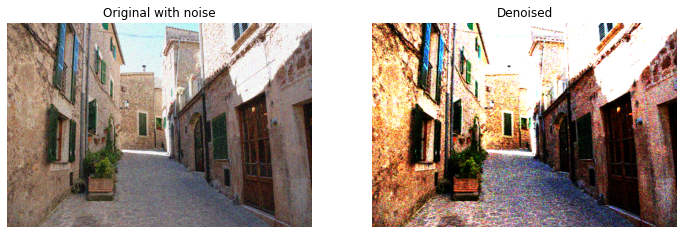

In [14]:
# Using  function dwt
tau = 10

a_red, b_red = pywt.dwt(red_noise_img, 'haar')
a_thres_red, b_thres_red = Gamma(a_red,tau), Gamma(b_red,tau)
red_no_noise = pywt.idwt(a_thres_red, b_thres_red, 'haar')

a_green, b_green = pywt.dwt(green_noise_img, 'haar')
a_thres_green, b_thres_green = Gamma(a_green,tau), Gamma(b_green,tau)
green_no_noise = pywt.idwt(a_thres_green, b_thres_green, 'haar')

a_blue, b_blue = pywt.dwt(blue_noise_img, 'haar')
a_thres_blue, b_thres_blue = Gamma(a_blue,tau), Gamma(b_blue,tau)
blue_no_noise = pywt.idwt(a_thres_blue, b_thres_blue, 'haar')

reconstruction = np.zeros((red_no_noise.shape[0], red_no_noise.shape[1], 3))
reconstruction[:,:,0] = red_no_noise
reconstruction[:,:,1] = green_no_noise
reconstruction[:,:,2] = blue_no_noise

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Original with noise')

plt.subplot(1, 2, 2)
plt.imshow(reconstruction*255) #Ajout de ce coeff multiplicatif sinon les coeffs sont trop petits
plt.axis('off')
plt.title('Denoised')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


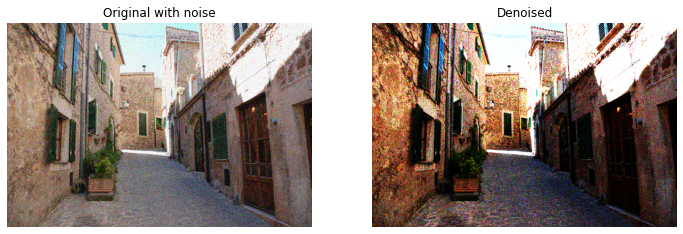

In [15]:
# Using function waverec
tau = 10

a_red = pywt.wavedec(red_noise_img, 'haar', level = 0)
a_thres_red = Gamma(np.array(a_red),tau)
red_no_noise = np.clip(pywt.waverec(list(a_thres_red), 'haar'),0,255)

a_green = pywt.wavedec(green_noise_img, 'haar', level = 0)
a_thres_green = Gamma(np.array(a_green),tau)
green_no_noise = np.clip(pywt.waverec(list(a_thres_green), 'haar'),0,255)

a_blue = pywt.wavedec(blue_noise_img, 'haar', level = 0)
a_thres_blue = Gamma(np.array(a_blue),tau)
blue_no_noise = np.clip(pywt.waverec(list(a_thres_blue), 'haar'),0,255)

reconstruction = np.zeros((red_no_noise.shape[0], red_no_noise.shape[1], 3))
reconstruction[:,:,0] = red_no_noise
reconstruction[:,:,1] = green_no_noise
reconstruction[:,:,2] = blue_no_noise

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_img)
plt.axis('off')
plt.title('Original with noise')

plt.subplot(1, 2, 2)
plt.imshow(reconstruction*255)
plt.axis('off')
plt.title('Denoised')

plt.show()

[]

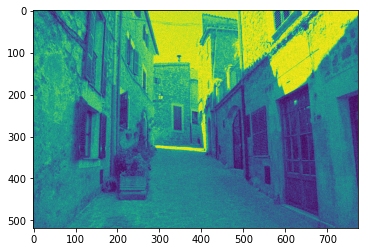

In [25]:
noisy_img = cv2.imread('FFDNET_IPOL/noisy.png')
noisy_gray = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
plt.imshow(noisy_gray)
plt.plot()